In [31]:
#Linked In Data Science course practice

import numpy as np
import pandas as pd

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [32]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set_style("whitegrid")

In [4]:
#Creating a series and a data frame

missing_series = Series(['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'])
missing_series

0    row 1
1    row 2
2    row 3
3    row 4
4    row 5
5    row 6
dtype: object

In [5]:
#dataframe 
np.random.seed(25)
missing_df = DataFrame(np.random.randn(36).reshape((6,6)), index = ['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'], 
                       columns = ['col 1', 'col 2', 'col 3', 'col 4', 'col 5', 'col 6'])
missing_df

,col 1,col 2,col 3,col 4,col 5,col 6
row 1,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
row 2,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
row 3,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
row 4,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
row 5,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
row 6,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [6]:
#Setting some of the values as missing
missing_val = np.nan
missing_df.iloc[3:5, 0] = missing_val
missing_df

,col 1,col 2,col 3,col 4,col 5,col 6
row 1,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
row 2,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
row 3,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
row 4,NaN,-0.419678,2.294842,-2.594487,2.822756,0.680889
row 5,NaN,-1.976254,0.533340,-0.290870,-0.513520,1.982626
row 6,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


([<matplotlib.patches.Wedge at 0xcbc0c88>,
 [Text(1.09732,0.0767321,u''),
  Text(1.05739,0.303201,u''),
  Text(0.889919,0.646564,u''),
  Text(0.482208,0.988673,u''),
  Text(-0.191013,1.08329,u''),
  Text(-0.889919,0.646564,u''),
  Text(-1.05739,-0.303201,u''),
  Text(-0.266114,-1.06733,u''),
  Text(0.889919,-0.646564,u'')])

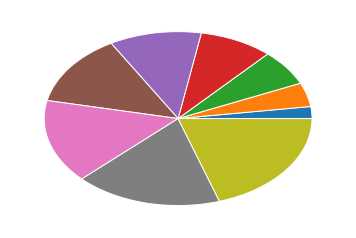

In [7]:
x = range(1,10)
y = range(1,10)
plt.pie(y)

<BarContainer object of 9 artists>

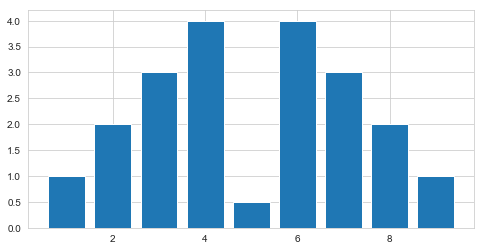

In [33]:
#defining plot color
x = range(1,10)
y = [1, 2, 3, 4, 0.5, 4, 3, 2, 1]

plt.bar(x,y)

<BarContainer object of 9 artists>

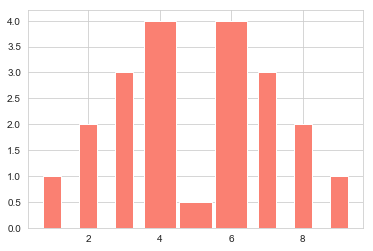

In [9]:
width = [0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.5, 0.5, 0.5]
color = ['salmon']
plt.bar(x, y, width=width, color=color, align='center')

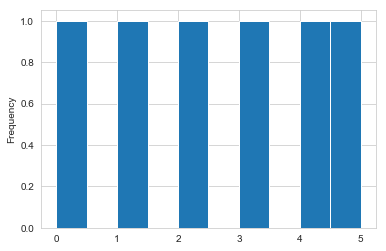

In [10]:
x = Series(np.arange(6))
x.plot(kind="Hist")

In [14]:
df = DataFrame({'Name':['Tom', 'Alice', 'Bob'], 'age':[10, 20, 10]}, index=['row 1', 'row 2', 'row 3'])
df

,Name,age
row 1,Tom,10
row 2,Alice,20
row 3,Bob,10


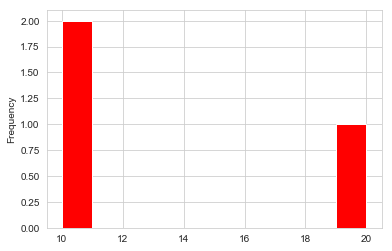

In [16]:
df['age'].plot(kind='Hist', color="Red")

[]

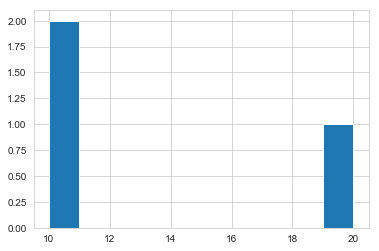

In [18]:
plt.hist(df['age'])
plt.plot()

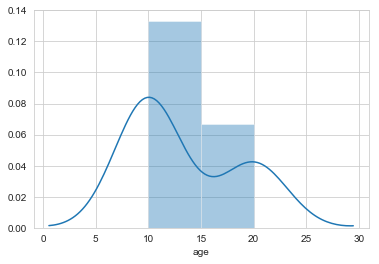

In [19]:
#Creating histogram in Seaborn
df_test = df['age']
sb.distplot(df_test)

In [28]:
df_index = [1, 2, 3]
df['df_index'] = df_index

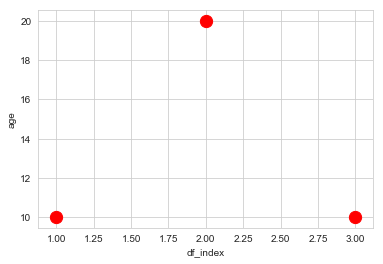

In [29]:
#Creating a scatterplot
df.plot(kind='Scatter', x='df_index', y='age', c=['Red'], s=150 )

In [35]:
#Paramteric methods to get the correlation between variables.
#Requriements for Pearson Correlation analysis
# ----Data should be normally distributed
# ----Continuous numerical variables
# ----variables are linearly related

cars_df = pd.read_csv('auto-mpg.csv')
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


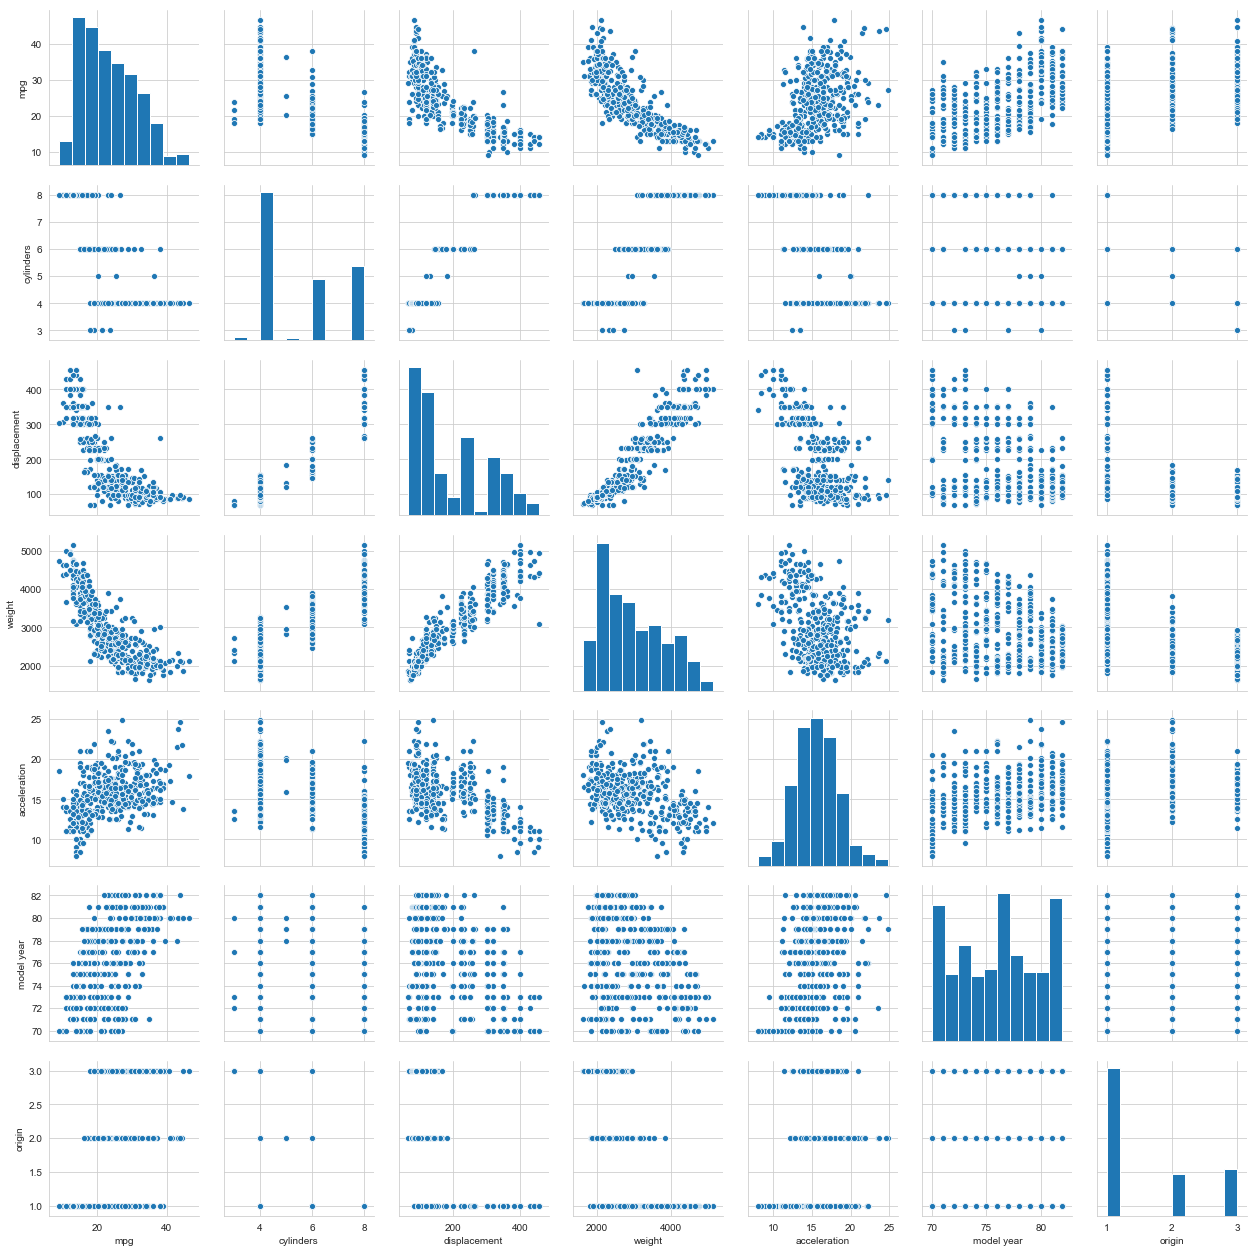

In [39]:
sb.pairplot(cars_df)

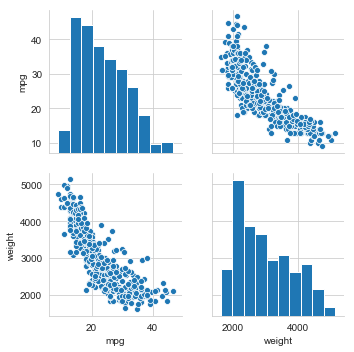

In [43]:
x = cars_df[['mpg','horsepower', 'weight']]
sb.pairplot(x)

#Normally distributed - Usually have a bell shaped curve (Histograms)
#Linearly related - When one var increases and the other decreases
#Continuous, numeric variables -- Which are not binomial or multinomial 
#(the graphs are mostly not random and will have two(binomial) or three+(multinomial) values)

#***Note*** Pearson correlation is given by R value
#If R value is near to 1 or -1, that means variables are correlated
#If R value is near to 0, it may or may not be correlated. (no guarantees)

In [45]:
#Checking the column datatypes
cars_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [52]:
#Converting the object datatype to float
cars_df["horsepower"] = cars_df.horsepower.convert_objects(convert_numeric=True)
#['horsepower']

C:\Users\rocki\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [53]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [60]:
mpg = cars_df['mpg']
wt = cars_df['weight']

pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print("Pearson coeff %0.3f" %pearsonr_coefficient)

#So here the mpg and wt are strongly negatively correlated

Pearson coeff -0.832


In [61]:
#Shortcut to get the linear correlation
corr = x.corr()
corr

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


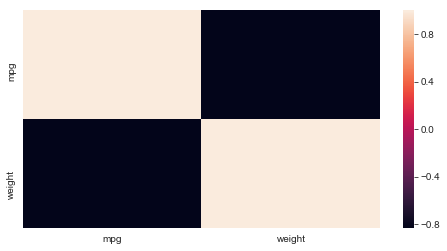

In [62]:
#Now using heatmap of Seaborn
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#Here black are -ve correlations
# And Whites are +ve correlations

In [ ]:
#In this we will look at how we can observe the non-linear relationships 
#Non parametric correlation
# 1. Spearman's rank correlation -works on ordinal data types - numeric var that can be categorized
# 2. Chi-square - 

#Spearman is similar to Pearson's 1,0,-1
#Assumptions: Data is Ordinal, non normally distributed and related non linearly

#Chi sqaure tables test for independence
# p < 0.05, Reject null hypothesis and conclude that variables are correlated
# p > 0.05, Accept null hypothesis and conclude that the variables are independent

# When do we use Chi-square ? 
# 1. When variables are categorical or numeric
# 2. You have binned the numeric variables


In [63]:
from scipy.stats import spearmanr

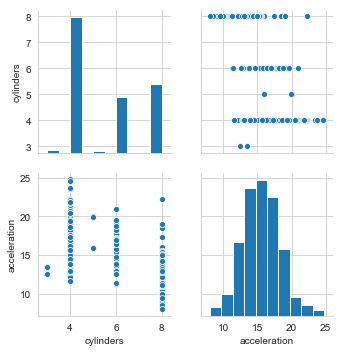

In [70]:
x_new = cars_df[['cylinders', 'acceleration']]
sb.pairplot(x_new)

In [71]:
cyl = cars_df['cylinders']
acc = cars_df['acceleration']
spearmanr_coeffiienct, p_value = spearmanr(cyl, acc)
print("Spearman Rank Correlation %0.3f " % (spearmanr_coeffiienct))

Spearman Rank Correlation -0.474 


In [74]:
#Let's do chi square
table = pd.crosstab(cyl, acc)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi square statistic %0.3f p_value %0.3f " %(chi2, p))

#here p_value is less than 0.05, therefore, reject the hypothesis
# and conclude that the variables are correlated. 

Chi square statistic 673.184 p_value 0.000 


In [76]:
#Let's discuss scaling and transforming the data
#Why and when to use scaling? 
#To prevent differening magnitude among variables from producing erroneous or misleading statistics.
#To prepare data for machine learning

#How can we do the scaling? 1. Normalization 2. Standardization

#What's normalization? 
#Putting each observation on a relative scale btw 0 and 1
#value of observation / sum of all observations in variables

#What's Standardization? 
#rescaling data so it has zero mean and unit variance



In [77]:
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import scale

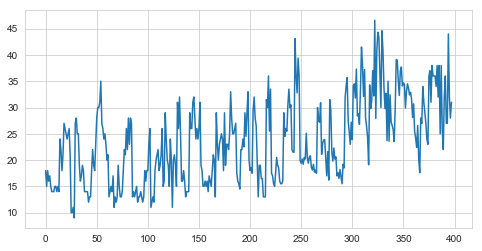

In [81]:
#Scaling

mpg = cars_df[['mpg']]
plt.plot(mpg)

In [82]:
mpg.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


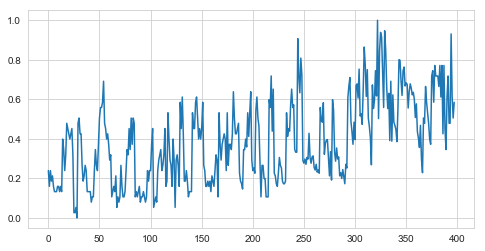

In [85]:
#mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
#for different range, pass feature_range=(0,10) in the above
scaled_mpg = scaled.fit_transform(mpg)
plt.plot(scaled_mpg)

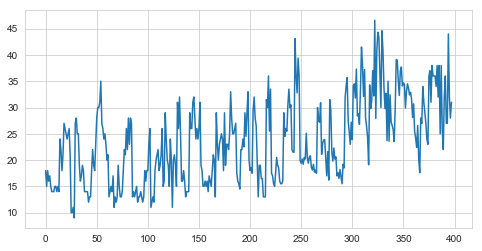

In [86]:
#Let's standardize
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

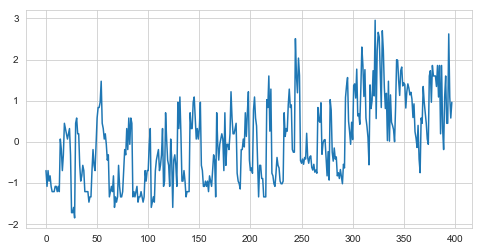

In [87]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

#It can be seen that the data has been standardized with zero mean and unit variance
#In other words the variable has standard normal distribution

In [88]:
# Machine Learning Revision


# Vocabulary -  feature - columns, attribute - rows, Target - dependent variable

# 2/3 train set, 1/3 is testing

# supervised (Prediction from labeled data) 
# unsupervised (Prediction from unlabeled data)

# Factor Analysis - Regression method used to explore datasets to find the rootcauses that explain why a data is acting a certain way
# factors - latent variables (meaningful but not directly observable)
# Assumptions: Features are metric, continuous & ordinal, 
# r>0.3 correlation btw features in the dataset, 
# More than 100 observations and more than 5 observations per feature
# Sample is homogenous

from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [95]:
iris = datasets.load_iris()
X = iris.data
variables_name = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [96]:
factor = FactorAnalysis().fit(X)
#components/factors with maximum variance
pd.DataFrame(factor.components_, columns=variables_name)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


In [97]:
#Singular Value Decompostions

#Principal component Analysis - Unsupervised  algo
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [99]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [100]:
# This is cumulative Variance and a value of 1.0 means that we got all of the data in the explained variance ration
# This means that we got all the noise as well
# PCA aims at removing that noise
pca.explained_variance_ratio_.sum()

1.0

In [101]:
# if we carefully look at the explained variance ratio, we can see 94% of the variance is explained by the 
# first two components while the other components are relatively low
# So, we'll be getting rid of all those

comps = pd.DataFrame(pca.components_, columns=variables_name)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


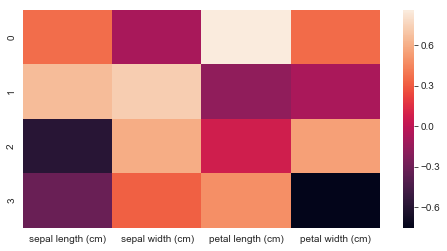

In [103]:
#Let's create heatmap for correlation

sb.heatmap(comps)
# we can deduce that component 0 is positively correlated with sepal width and similary other results
# Now we can use component 0 and 1 as our input to the machine learning models like regression.  

In [ ]:
# Outlier detection 

# Three types - 
# point(univariate)  
# contexual outliers  
# collective outliers

# some of the important outlier detection  methods are: 
# Extreme value analysis with the Tukey methods
# Multivariate analysis with boxplots and scatterplot matrices
# Machine Learning density based spatial clustering of applications with noise(DBSCAN) and PCA

# USed for anomly detection

# 1. Univariate method - Tukey Method (Boxplots)
# Interquartile range = upper quartile(25% data points are greater than this value) - lower quartile(25% are less than this value) 
# "Boxplot whiskers" are set at 1.5 (IQR). Data points past these whiskers are outliers
